In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graphstats import *
from graspy.utils.ptr import pass_to_ranks as PTR

In [6]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
it = 100
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

max_dim = 1

mu1 = 100
mu2 = 102
scale1 = 9
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr_ecdf_ds = [[] for i in range(len(n))]
up_ecdf_ds = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1]
        
        up_class = updated_priors_classification(A, all_seeds, seed_labels, pis, max_dim = 1, method = "KS", X_hat = X_hat_C, acorn = j)
        
        ptr_ecdf_ds[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_ecdf_ds[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [59:47<00:00, 448.48s/it]


In [7]:
import _pickle as pickle
pickle.dump(up_ecdf_ds, open('up_ecdf_ds.pkl', 'wb'))
pickle.dump(ptr_ecdf_ds, open('ptr_ecdf_ds.pkl', 'wb'))

(0, 1)

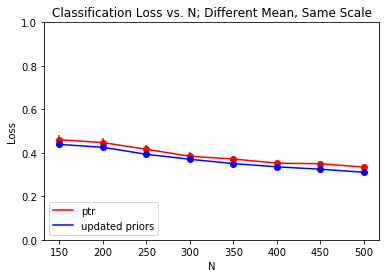

In [29]:
ptr_means = np.array([np.mean(i) for i in ptr_ecdf_ds])
up_means = np.array([np.mean(i) for i in up_ecdf_ds])

ptr_std = np.array([np.std(i, ddof = 1) for i in ptr_ecdf_ds])
up_std = np.array([np.std(i, ddof = 1) for i in up_ecdf_ds])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_means, yerr = 1.96*ptr_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_means, yerr = 1.96*up_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Classification Loss vs. N; Different Mean, Same Scale')
ax.set_xlabel('N')
ax.set_ylabel('Loss')
ax.legend(loc = 'lower left')
ax.set_ylim(0,1)

#plt.savefig('ptrVSupdatedpriors_ds_ecdf.png')

In [9]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
it = 100
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

max_dim = 1

mu1 = 100
mu2 = 102
scale1 = 4
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr_ecdf_dd = [[] for i in range(len(n))]
up_ecdf_dd = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1]
        
        up_class = updated_priors_classification(A, all_seeds, seed_labels, pis, max_dim = 1, method = "KS", X_hat = X_hat_C, acorn = j)
        
        ptr_ecdf_dd[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_ecdf_dd[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [59:42<00:00, 447.79s/it]


In [10]:
import _pickle as pickle
pickle.dump(up_ecdf_dd, open('up_ecdf_dd.pkl', 'wb'))
pickle.dump(ptr_ecdf_dd, open('ptr_ecdf_dd.pkl', 'wb'))

(0, 1)

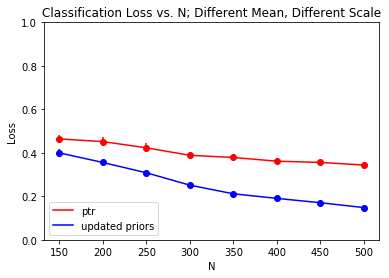

In [28]:
ptr_means = np.array([np.mean(i) for i in ptr_ecdf_dd])
up_means = np.array([np.mean(i) for i in up_ecdf_dd])

ptr_std = np.array([np.std(i, ddof = 1) for i in ptr_ecdf_dd])
up_std = np.array([np.std(i, ddof = 1) for i in up_ecdf_dd])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_means, yerr = 1.96*ptr_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_means, yerr = 1.96*up_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Classification Loss vs. N; Different Mean, Different Scale')
ax.set_xlabel('N')
ax.set_ylabel('Loss')
ax.legend(loc = 'lower left')
ax.set_ylim(0,1)

#plt.savefig('ptrVSupdatedpriors_dd_ecdf.png')

In [53]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
#n = [1000, 2000]
it = 10
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

max_dim = 1

mu1 = 100
mu2 = 100
scale1 = 9
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr_ecdf_ss = [[] for i in range(len(n))]
up_ecdf_ss = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1]
        
        up_class = updated_priors_classification(A, all_seeds, seed_labels, pis, max_dim = 1, method = "KS", X_hat = X_hat_C, acorn = j)
        
        ptr_ecdf_ss[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_ecdf_ss[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [36:08<00:00, 1084.15s/it]


In [24]:
import _pickle as pickle
#pickle.dump(up_ecdf_ss, open('up_ecdf_ss.pkl', 'wb'))
#pickle.dump(ptr_ecdf_ss, open('ptr_ecdf_ss.pkl', 'wb'))
#ptr_ecdf_ss = pickle.load(open('ptr_ecdf_ss.pkl', 'rb'))
#up_ecdf_ss = pickle.load(open('up_ecdf_ss.pkl', 'rb'))

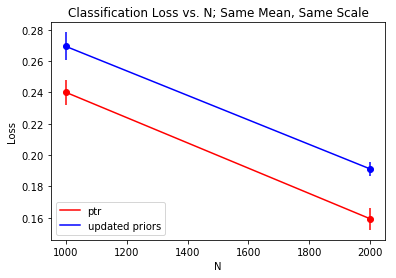

In [56]:
ptr_means = np.array([np.mean(i) for i in ptr_ecdf_ss])
up_means = np.array([np.mean(i) for i in up_ecdf_ss])

ptr_std = np.array([np.std(i, ddof = 1) for i in ptr_ecdf_ss])
up_std = np.array([np.std(i, ddof = 1) for i in up_ecdf_ss])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_means, yerr = 1.96*ptr_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_means, yerr = 1.96*up_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Classification Loss vs. N; Same Mean, Same Scale')
ax.set_xlabel('N')
ax.set_ylabel('Loss')
ax.legend(loc = 'lower left')
#ax.set_ylim(0, 1)

#plt.savefig('ptrVSupdatedpriors_ss_ecdf.png')

In [16]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
it = 100
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

max_dim = 1

mu1 = 100
mu2 = 100
scale1 = 4
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr_ecdf_sd = [[] for i in range(len(n))]
up_ecdf_sd = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1]
        
        up_class = updated_priors_classification(A, all_seeds, seed_labels, pis, max_dim = 1, method = "KS", X_hat = X_hat_C, acorn = j)
        
        ptr_ecdf_sd[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_ecdf_sd[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

100%|█████████████████████████████████████████████████████████████████████████████████| 8/8 [1:24:51<00:00, 636.40s/it]


In [17]:
import _pickle as pickle
#pickle.dump(up_ecdf_sd, open('up_ecdf_sd.pkl', 'wb'))
#pickle.dump(ptr_ecdf_sd, open('ptr_ecdf_sd.pkl', 'wb'))

(0, 1)

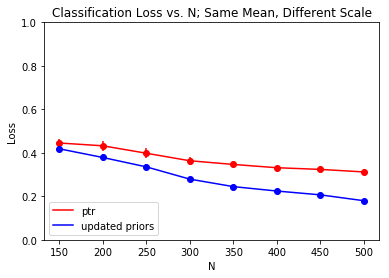

In [33]:
ptr_means = np.array([np.mean(i) for i in ptr_ecdf_sd])
up_means = np.array([np.mean(i) for i in up_ecdf_sd])

ptr_std = np.array([np.std(i, ddof = 1) for i in ptr_ecdf_sd])
up_std = np.array([np.std(i, ddof = 1) for i in up_ecdf_sd])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_means, yerr = 1.96*ptr_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_means, yerr = 1.96*up_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Classification Loss vs. N; Same Mean, Different Scale')
ax.set_xlabel('N')
ax.set_ylabel('Loss')
ax.legend(loc = 'lower left')
ax.set_ylim(0,1)

#plt.savefig('ptrVSupdatedpriors_sd_ecdf.png')

In [102]:
#n = [150, 200, 250, 300, 350, 400, 450, 500]
n = [1000]
it = 50
seed_ratio = 0.1
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

max_dim = 1

mu1 = 100
mu2 = 100
scale1 = 4
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr = [[] for i in range(len(n))]
gclass = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1]
        
        gclass_class = gaussian_classification(X_hat_C, all_seeds, seed_labels)
        
        ptr[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        gclass[i].append((np.sum(gclass_class == all_labels) - ns)/(n[i] - ns))

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


KeyboardInterrupt: 

(0, 1)

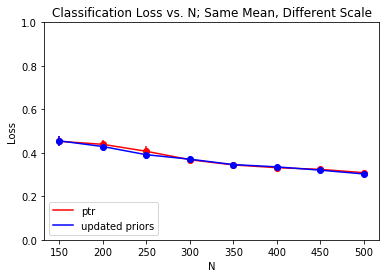

In [34]:
ptr_means = np.array([np.mean(i) for i in ptr])
up_means = np.array([np.mean(i) for i in gclass])

ptr_std = np.array([np.std(i, ddof = 1) for i in ptr])
up_std = np.array([np.std(i, ddof = 1) for i in gclass])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_means, yerr = 1.96*ptr_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_means, yerr = 1.96*up_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Classification Loss vs. N; Same Mean, Different Scale')
ax.set_xlabel('N')
ax.set_ylabel('Loss')
ax.legend(loc = 'lower left')
ax.set_ylim(0,1)

#plt.savefig('ptrVSupdatedpriors_sd_ecdf.png')

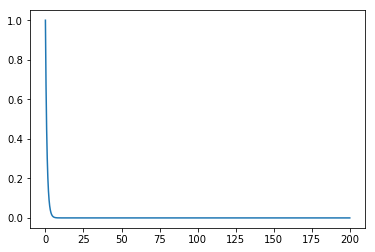

In [51]:
fig, ax = plt.subplots(1,1)
xs = np.arange(0, 200, step = .1)

ax.plot(xs, np.exp(-xs))

In [103]:
mu1 = 100
mu2 = 100
scale1 = 4
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

A = adj_matrix(1000, pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
seed_weights = get_weights(A, all_seeds, seed_labels)
unlabeled_weight = get_weights(A, all_seeds, seed_labels, 35)

In [104]:
class1 = seed_weights[0][0]
class2 = seed_weights[1][0]

class1_ord = np.sort(class1)
class2_ord = np.sort(class2)

ecdf1 = np.arange(1, len(class1_ord) + 1)/len(class1_ord)
ecdf2 = np.arange(1, len(class2_ord) + 1)/len(class2_ord)



In [105]:
unlabeled_ord = np.sort(unlabeled_weight[0])
ecdfu = np.arange(1, len(unlabeled_ord) + 1)/len(unlabeled_ord)

min_ = min(min(unlabeled_ord), min(ecdf1), min(ecdf2))
max_ = max(max(unlabeled_ord), max(ecdf1), max(ecdf2))

min(unlabeled_ord), min(ecdf1), min(ecdf2)

(94.51805223716838, 0.002976190476190476, 0.001607717041800643)

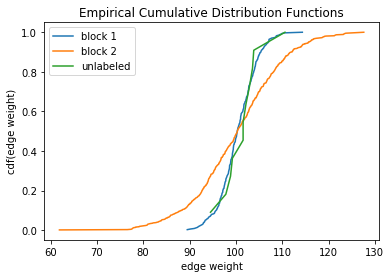

In [109]:
fig, ax = plt.subplots(1,1)
ax.plot(class1_ord, ecdf1, label= 'block 1')
ax.plot(class2_ord, ecdf2, label = 'block 2')
ax.plot(unlabeled_ord, ecdfu, label = 'unlabeled')
ax.legend(loc = 'upper left')
ax.set_title('Empirical Cumulative Distribution Functions')
ax.set_xlabel('edge weight')
ax.set_ylabel('cdf(edge weight)')

plt.savefig('ecdf_example.png')

In [94]:
np.insert(class1_ord, 0, min_)

array([5.95238095e-03, 9.00865388e+01, 9.01940634e+01, 9.15548467e+01,
       9.16638719e+01, 9.28853421e+01, 9.30006162e+01, 9.33532975e+01,
       9.39144108e+01, 9.43788760e+01, 9.48926664e+01, 9.57681435e+01,
       9.61403482e+01, 9.63132373e+01, 9.66496361e+01, 9.67922954e+01,
       9.69353867e+01, 9.69973893e+01, 9.72456778e+01, 9.73306057e+01,
       9.74560737e+01, 9.77883913e+01, 9.78165006e+01, 9.81538256e+01,
       9.85993799e+01, 9.87156324e+01, 9.92553147e+01, 9.94742996e+01,
       9.97321395e+01, 9.98690818e+01, 1.00237911e+02, 1.00323836e+02,
       1.00576677e+02, 1.00580274e+02, 1.00599544e+02, 1.00668992e+02,
       1.00684286e+02, 1.00782028e+02, 1.00836256e+02, 1.01060942e+02,
       1.01096594e+02, 1.01118405e+02, 1.01321646e+02, 1.01440906e+02,
       1.01513102e+02, 1.01585006e+02, 1.01713084e+02, 1.01815058e+02,
       1.01934993e+02, 1.02086473e+02, 1.02369818e+02, 1.02772124e+02,
       1.02933860e+02, 1.03045287e+02, 1.03689827e+02, 1.03694136e+02,
      

In [116]:
n = [150, 200, 250, 300, 350, 400, 450, 500]
#n = [1000, 2000]
it = 10
seed_ratio = 0.9
pi1 = 0.5
pi2 = 1 - pi1
pis = np.array([pi1, pi2])
pi = pis

p = 0.52
q = 0.48

B = np.array([[p**2, p*q], [p*q, q**2]])

max_dim = 1

mu1 = 100
mu2 = 100
scale1 = 9
scale2 = 9

means = np.array([[mu1, mu2], [mu2, mu1]])
scales = np.array([[scale1, scale2], [scale2, scale1]])

ptr_ecdf_ss_2 = [[] for i in range(len(n))]
up_ecdf_ss_2 = [[] for i in range(len(n))]

for i in tqdm(range(len(n))):
    n1 = int(np.round(n[i]*seed_ratio*pi[0]))
    n2 = int(np.round(n[i]*seed_ratio*(1 - pi[0])))
    
    ns  = n1 + n2

    seeds1 = np.arange(0, n1)
    seeds2 = np.arange(int(np.round(n[i]*pi[0])), int(np.round(n[i]*pi[0])) + n2)
    all_seeds = np.concatenate((seeds1, seeds2))

    labels1 = np.zeros(len(seeds1))
    labels2 = np.ones(len(seeds2))
    seed_labels = np.concatenate((labels1, labels2))

    all_labels = np.concatenate((np.zeros(int(np.round(n[i]*pi[0]))), np.ones(int(np.round(n[i]*pi[1])))))
    
    for j in range(it):
        A = adj_matrix(n[i], pis, B, True, dist = "normal", means = means, scales = scales, acorn = j)
        
        A_ptr = pass_to_ranks(A)
        V_ptr, U_ptr = adj_spectral_embedding(A_ptr, max_dim = 2, acorn = j)
        X_hat = V_ptr[:, :1]
        ptr_class = gaussian_classification(X_hat, all_seeds, seed_labels)
        
        C = strip_weights(A)
        V_C, U_C = adj_spectral_embedding(C, max_dim = 2, acorn = j)
        X_hat_C = V_C[:, :1]
        
        up_class = updated_priors_classification(A, all_seeds, seed_labels, pis, max_dim = 1, method = "KS", X_hat = X_hat_C, acorn = j)
        
        ptr_ecdf_ss_2[i].append((np.sum(ptr_class == all_labels) - ns)/(n[i] - ns))
        up_ecdf_ss_2[i].append((np.sum(up_class == all_labels) - ns)/(n[i] - ns))

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [06:25<00:00, 48.22s/it]


In [111]:
import _pickle as pickle
pickle.dump(up_ecdf_ss_2, open('up_ecdf_ss_2.pkl', 'wb'))
pickle.dump(ptr_ecdf_ss_2, open('ptr_ecdf_ss_2.pkl', 'wb'))

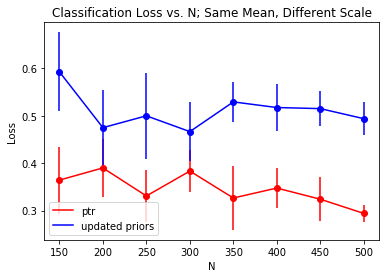

In [117]:
ptr_means = np.array([np.mean(i) for i in ptr_ecdf_ss_2])
up_means = np.array([np.mean(i) for i in up_ecdf_ss_2])

ptr_std = np.array([np.std(i, ddof = 1) for i in ptr_ecdf_ss_2])
up_std = np.array([np.std(i, ddof = 1) for i in up_ecdf_ss_2])

fig, ax = plt.subplots(1,1)

ax.plot(n, 1 - ptr_means, label = 'ptr', c = 'r')
ax.plot(n, 1 - up_means, label = 'updated priors', c = 'b')
ax.errorbar(n, 1 - ptr_means, yerr = 1.96*ptr_std/np.sqrt(it), fmt='o', c = 'r')
ax.errorbar(n, 1 - up_means, yerr = 1.96*up_std/np.sqrt(it), fmt='o', c = 'b')
ax.set_title('Classification Loss vs. N; Same Mean, Different Scale')
ax.set_xlabel('N')
ax.set_ylabel('Loss')
ax.legend(loc = 'lower left')
#ax.set_ylim(0,1)

plt.savefig('ptrVSupdatedpriors_ss_ecdf_2.png')